In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Cleaning

In [34]:
#import csv data
df = pd.read_csv('adjust_sampled_data.csv')
df.head()

,Unnamed: 0,adid,network_name,installed_at,activity_kind,event_name,created_at
0,0,1dcedd19b197650bd08a1f521caa3f8b,Organic,2019-07-06 00:07:04,event,get_contact,2019-07-08 15:33:44
1,1,d621e1bfa590881a68581733052dce57,Organic,2019-07-06 00:14:50,event,get_contact,2019-07-08 15:53:04
2,2,7107c045edc8eb4740ea7d8d7fd0b4aa,Organic,2019-07-06 00:33:40,event,new_post_submit,2019-07-08 10:24:14
3,3,32a53ff379ace92a650f0a41f1d02af1,Organic,2019-07-06 02:33:10,event,get_contact,2019-07-08 09:21:11
4,4,1eaeca850ef726e6c12475e099a9d9de,Organic,2019-07-06 03:28:56,event,get_contact,2019-07-06 14:00:28


In [35]:
#variable definition
# adid : Unique ID of each user , we convert it to userID
# network_name : ad network name
# installed_at : User installation time (with accuracy of seconds)
# activity_kind : Type of activity performed
# event_name : Type of event occurred
# created_at : Time to occur

In [36]:
# split time columns
df['installed_at']= pd.to_datetime(df['installed_at'])
df['date_installed_at'] = df['installed_at'].dt.date
df['time_installed_at'] = df['installed_at'].dt.time

df['created_at']= pd.to_datetime(df['created_at'])
df['date_created_at'] = df['created_at'].dt.date
df['time_created_at'] = df['created_at'].dt.time

# Clear extra columns
df["userID"] = df['adid'].copy()
df1 = df.drop(['adid','created_at','installed_at'],axis=1)

# sort
df1 = df1[['userID', 'network_name','activity_kind','event_name','date_installed_at','time_installed_at','date_created_at','time_created_at']]

df1.head()

,userID,network_name,activity_kind,event_name,date_installed_at,time_installed_at,date_created_at,time_created_at
0,1dcedd19b197650bd08a1f521caa3f8b,Organic,event,get_contact,2019-07-06,00:07:04,2019-07-08,15:33:44
1,d621e1bfa590881a68581733052dce57,Organic,event,get_contact,2019-07-06,00:14:50,2019-07-08,15:53:04
2,7107c045edc8eb4740ea7d8d7fd0b4aa,Organic,event,new_post_submit,2019-07-06,00:33:40,2019-07-08,10:24:14
3,32a53ff379ace92a650f0a41f1d02af1,Organic,event,get_contact,2019-07-06,02:33:10,2019-07-08,09:21:11
4,1eaeca850ef726e6c12475e099a9d9de,Organic,event,get_contact,2019-07-06,03:28:56,2019-07-06,14:00:28


In [37]:
# nan variables
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785168 entries, 0 to 785167
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   userID             785168 non-null  object
 1   network_name       785168 non-null  object
 2   activity_kind      785168 non-null  object
 3   event_name         681147 non-null  object
 4   date_installed_at  785168 non-null  object
 5   time_installed_at  785168 non-null  object
 6   date_created_at    785168 non-null  object
 7   time_created_at    785168 non-null  object
dtypes: object(8)
memory usage: 47.9+ MB


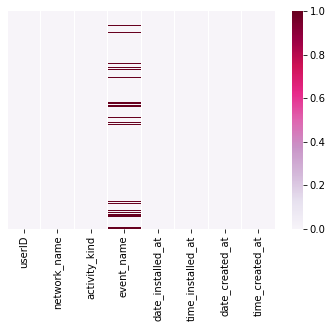

In [38]:
# If an event has occurred, column A has a value, otherwise it is empty. 
# So having null information in this column is OK.
heat_map = sns.heatmap(df1.isnull(), yticklabels = False, cbar = True, cmap = "PuRd", vmin = 0, vmax = 1)

# Percentage of users who have performed at least one important activity in the application up to three days after installing the app

## 1.User quality

In [294]:
df1.head()

,userID,network_name,activity_kind,event_name,date_installed_at,time_installed_at,date_created_at,time_created_at
0,1dcedd19b197650bd08a1f521caa3f8b,Organic,event,get_contact,2019-07-06,00:07:04,2019-07-08,15:33:44
1,d621e1bfa590881a68581733052dce57,Organic,event,get_contact,2019-07-06,00:14:50,2019-07-08,15:53:04
2,7107c045edc8eb4740ea7d8d7fd0b4aa,Organic,event,new_post_submit,2019-07-06,00:33:40,2019-07-08,10:24:14
3,32a53ff379ace92a650f0a41f1d02af1,Organic,event,get_contact,2019-07-06,02:33:10,2019-07-08,09:21:11
4,1eaeca850ef726e6c12475e099a9d9de,Organic,event,get_contact,2019-07-06,03:28:56,2019-07-06,14:00:28


In [295]:
df13 = df1.groupby(['activity_kind']).agg({'userID':'nunique'}).reset_index()
df13

,activity_kind,userID
0,event,47552
1,install,89381
2,uninstall,12757


In [296]:
df11 = df1[df1["activity_kind"] != "uninstall"]
df11.head()

,userID,network_name,activity_kind,event_name,date_installed_at,time_installed_at,date_created_at,time_created_at
0,1dcedd19b197650bd08a1f521caa3f8b,Organic,event,get_contact,2019-07-06,00:07:04,2019-07-08,15:33:44
1,d621e1bfa590881a68581733052dce57,Organic,event,get_contact,2019-07-06,00:14:50,2019-07-08,15:53:04
2,7107c045edc8eb4740ea7d8d7fd0b4aa,Organic,event,new_post_submit,2019-07-06,00:33:40,2019-07-08,10:24:14
3,32a53ff379ace92a650f0a41f1d02af1,Organic,event,get_contact,2019-07-06,02:33:10,2019-07-08,09:21:11
4,1eaeca850ef726e6c12475e099a9d9de,Organic,event,get_contact,2019-07-06,03:28:56,2019-07-06,14:00:28


In [297]:
# The time interval between install and first event
df11["interval"] = df11["date_created_at"] - df11["date_installed_at"]
df11["interval"] = df11["interval"].dt.days.astype('int16')
df11.head()

<ipython-input-297-a2a5b1f8c3dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11["interval"] = df11["date_created_at"] - df11["date_installed_at"]
<ipython-input-297-a2a5b1f8c3dc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11["interval"] = df11["interval"].dt.days.astype('int16')


,userID,network_name,activity_kind,event_name,date_installed_at,time_installed_at,date_created_at,time_created_at,interval
0,1dcedd19b197650bd08a1f521caa3f8b,Organic,event,get_contact,2019-07-06,00:07:04,2019-07-08,15:33:44,2
1,d621e1bfa590881a68581733052dce57,Organic,event,get_contact,2019-07-06,00:14:50,2019-07-08,15:53:04,2
2,7107c045edc8eb4740ea7d8d7fd0b4aa,Organic,event,new_post_submit,2019-07-06,00:33:40,2019-07-08,10:24:14,2
3,32a53ff379ace92a650f0a41f1d02af1,Organic,event,get_contact,2019-07-06,02:33:10,2019-07-08,09:21:11,2
4,1eaeca850ef726e6c12475e099a9d9de,Organic,event,get_contact,2019-07-06,03:28:56,2019-07-06,14:00:28,0


<AxesSubplot:ylabel='Frequency'>

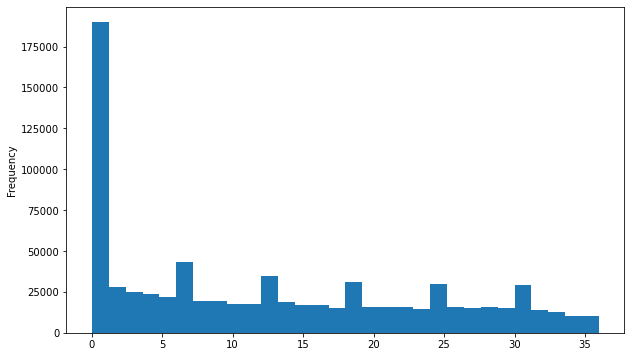

In [298]:
# since we want to calculate interval between install and event, so let's drop nan values from event column
df11["interval"].plot.hist(bins = 30, figsize = (10,6))

In [299]:
# select users who who have taken action less than three days after installing the app
df12 = df11[df11["interval"] <= 3]
df12.head()

,userID,network_name,activity_kind,event_name,date_installed_at,time_installed_at,date_created_at,time_created_at,interval
0,1dcedd19b197650bd08a1f521caa3f8b,Organic,event,get_contact,2019-07-06,00:07:04,2019-07-08,15:33:44,2
1,d621e1bfa590881a68581733052dce57,Organic,event,get_contact,2019-07-06,00:14:50,2019-07-08,15:53:04,2
2,7107c045edc8eb4740ea7d8d7fd0b4aa,Organic,event,new_post_submit,2019-07-06,00:33:40,2019-07-08,10:24:14,2
3,32a53ff379ace92a650f0a41f1d02af1,Organic,event,get_contact,2019-07-06,02:33:10,2019-07-08,09:21:11,2
4,1eaeca850ef726e6c12475e099a9d9de,Organic,event,get_contact,2019-07-06,03:28:56,2019-07-06,14:00:28,0


In [300]:
# select users who who have taken event greater than one
df13 = df12.groupby(['userID','network_name']).agg({'event_name':'count'}).reset_index()
df14 = df13[df13["event_name"] > 0]
df14.head()

,userID,network_name,event_name
1,0000dec6c8ff54711f456c2706d5c90a,Cafebazaar-searchad,4
2,0001d39202bb05282c0c47a8f7864a5d,Cafebazaar-searchad,2
7,00067f32488f30d23c0c086f20e1d8f0,Cafebazaar-searchad,1
8,00074374cb59e64c91c825a8bdee9834,Adwords UAC Installs,3
10,000a3ea09c1aa272eff769b545bfe7d5,Cafebazaar-searchad,1


In [335]:
best_users1 = df14.groupby(['network_name']).agg({'userID':'nunique'}).reset_index()
best_users1.rename(columns={'userID': 'best_users'}, inplace=True)
best_users1

,network_name,best_users
0,Adwords UAC Installs,8390
1,Cafebazaar-searchad,10270
2,Organic,7375
3,Tapsell,3975


In [336]:
#all users
all_users = df11.groupby(['network_name']).agg({'userID':'nunique'}).reset_index()
all_users.rename(columns={'userID': 'all_users'}, inplace=True)
all_users

,network_name,all_users
0,Adwords UAC Installs,26394
1,Cafebazaar-searchad,26070
2,Organic,22782
3,Tapsell,20032


In [343]:
best_users2 = pd.merge(all_users, best_users1, how='inner', on=['network_name'])
best_users2["per_best_users"] = ((best_users2["best_users"] / best_users2["all_users"]) * 100).round()

best_users = best_users2.drop(["all_users","best_users"],axis=1)
best_users2

,network_name,all_users,best_users,per_best_users
0,Adwords UAC Installs,26394,8390,32.0
1,Cafebazaar-searchad,26070,10270,39.0
2,Organic,22782,7375,32.0
3,Tapsell,20032,3975,20.0


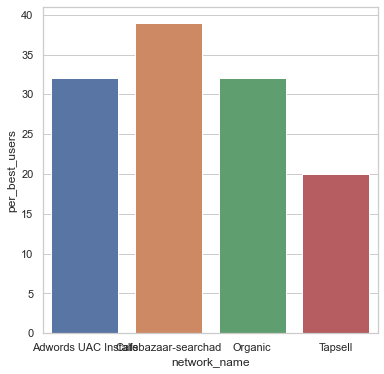

In [342]:
plt.figure(figsize=(6,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=best_users2["network_name"], y=best_users["per_best_users"], data=best_users)

## 2.app retention rate

In [401]:
df2 = pd.merge(df14, df1, how='inner', on=['userID'])
df2.head()

,userID,network_name_x,event_name_x,network_name_y,activity_kind,event_name_y,date_installed_at,time_installed_at,date_created_at,time_created_at
0,0000dec6c8ff54711f456c2706d5c90a,Cafebazaar-searchad,4,Cafebazaar-searchad,event,get_contact,2019-07-07,12:09:29,2019-07-10,07:23:22
1,0000dec6c8ff54711f456c2706d5c90a,Cafebazaar-searchad,4,Cafebazaar-searchad,event,get_contact,2019-07-07,12:09:29,2019-07-13,07:56:01
2,0000dec6c8ff54711f456c2706d5c90a,Cafebazaar-searchad,4,Cafebazaar-searchad,event,new_post_submit,2019-07-07,12:09:29,2019-07-13,04:58:42
3,0000dec6c8ff54711f456c2706d5c90a,Cafebazaar-searchad,4,Cafebazaar-searchad,event,new_post_submit,2019-07-07,12:09:29,2019-07-19,08:23:10
4,0000dec6c8ff54711f456c2706d5c90a,Cafebazaar-searchad,4,Cafebazaar-searchad,event,new_post_submit,2019-07-07,12:09:29,2019-07-19,17:30:37


In [402]:
df2["date_installed_at"].min()

datetime.date(2019, 7, 6)

In [403]:
df2['date_installed_at']= pd.to_datetime(df2['date_installed_at'])
df2['date_created_at']= pd.to_datetime(df2['date_created_at'])

In [404]:
df2['days_since_install'] = (df2['date_created_at'] - df2['date_installed_at']).dt.days
df2.head()

,userID,network_name_x,event_name_x,network_name_y,activity_kind,event_name_y,date_installed_at,time_installed_at,date_created_at,time_created_at,days_since_install
0,0000dec6c8ff54711f456c2706d5c90a,Cafebazaar-searchad,4,Cafebazaar-searchad,event,get_contact,2019-07-07,12:09:29,2019-07-10,07:23:22,3
1,0000dec6c8ff54711f456c2706d5c90a,Cafebazaar-searchad,4,Cafebazaar-searchad,event,get_contact,2019-07-07,12:09:29,2019-07-13,07:56:01,6
2,0000dec6c8ff54711f456c2706d5c90a,Cafebazaar-searchad,4,Cafebazaar-searchad,event,new_post_submit,2019-07-07,12:09:29,2019-07-13,04:58:42,6
3,0000dec6c8ff54711f456c2706d5c90a,Cafebazaar-searchad,4,Cafebazaar-searchad,event,new_post_submit,2019-07-07,12:09:29,2019-07-19,08:23:10,12
4,0000dec6c8ff54711f456c2706d5c90a,Cafebazaar-searchad,4,Cafebazaar-searchad,event,new_post_submit,2019-07-07,12:09:29,2019-07-19,17:30:37,12


In [405]:
df22 = df2.groupby(["userID","date_installed_at","date_created_at"]).agg({'time_installed_at':'count','time_created_at':'count'}).reset_index()
df22

,userID,date_installed_at,date_created_at,time_installed_at,time_created_at
0,0000dec6c8ff54711f456c2706d5c90a,2019-07-07,2019-07-07,3,3
1,0000dec6c8ff54711f456c2706d5c90a,2019-07-07,2019-07-10,2,2
2,0000dec6c8ff54711f456c2706d5c90a,2019-07-07,2019-07-13,2,2
3,0000dec6c8ff54711f456c2706d5c90a,2019-07-07,2019-07-18,1,1
4,0000dec6c8ff54711f456c2706d5c90a,2019-07-07,2019-07-19,2,2
...,...,...,...,...,...
152712,ffff2c703b908a40976723501aec6103,2019-07-07,2019-08-01,1,1
152713,ffff2c703b908a40976723501aec6103,2019-07-07,2019-08-02,1,1
152714,ffff2c703b908a40976723501aec6103,2019-07-07,2019-08-03,1,1
152715,ffff2c703b908a40976723501aec6103,2019-07-07,2019-08-04,7,7


In [406]:
df22['start_week'] = (df22['date_installed_at'].dt.strftime('%U')).astype('int16')
df22['event_week'] = (df22['date_created_at'].dt.strftime('%U')).astype('int16')
df22['weeks_since_start'] = df22['event_week'] - df22['start_week']
df22.head()

,userID,date_installed_at,date_created_at,time_installed_at,time_created_at,start_week,event_week,weeks_since_start
0,0000dec6c8ff54711f456c2706d5c90a,2019-07-07,2019-07-07,3,3,27,27,0
1,0000dec6c8ff54711f456c2706d5c90a,2019-07-07,2019-07-10,2,2,27,27,0
2,0000dec6c8ff54711f456c2706d5c90a,2019-07-07,2019-07-13,2,2,27,27,0
3,0000dec6c8ff54711f456c2706d5c90a,2019-07-07,2019-07-18,1,1,27,28,1
4,0000dec6c8ff54711f456c2706d5c90a,2019-07-07,2019-07-19,2,2,27,28,1


In [407]:
# Extract start month
df22['start_month'] = (df22['date_installed_at'].dt.month).astype('int16')
df22['event_month'] = (df22['date_created_at'].dt.month).astype('int16')

# Get the number of months since the user started
df22['months_since_start'] = df22['event_month']- df22['start_month']

df22["days_since_start"] = (df22["date_created_at"] - df22["date_installed_at"])
df22.head()

,userID,date_installed_at,date_created_at,time_installed_at,time_created_at,start_week,event_week,weeks_since_start,start_month,event_month,months_since_start,days_since_start
0,0000dec6c8ff54711f456c2706d5c90a,2019-07-07,2019-07-07,3,3,27,27,0,7,7,0,0 days
1,0000dec6c8ff54711f456c2706d5c90a,2019-07-07,2019-07-10,2,2,27,27,0,7,7,0,3 days
2,0000dec6c8ff54711f456c2706d5c90a,2019-07-07,2019-07-13,2,2,27,27,0,7,7,0,6 days
3,0000dec6c8ff54711f456c2706d5c90a,2019-07-07,2019-07-18,1,1,27,28,1,7,7,0,11 days
4,0000dec6c8ff54711f456c2706d5c90a,2019-07-07,2019-07-19,2,2,27,28,1,7,7,0,12 days


In [410]:
df23 = df22.groupby(["days_since_start"]).agg({'userID':'count'}).reset_index()
df23.head()

,days_since_start,userID
0,0 days,28827
1,1 days,10195
2,2 days,7904
3,3 days,6995
4,4 days,4917


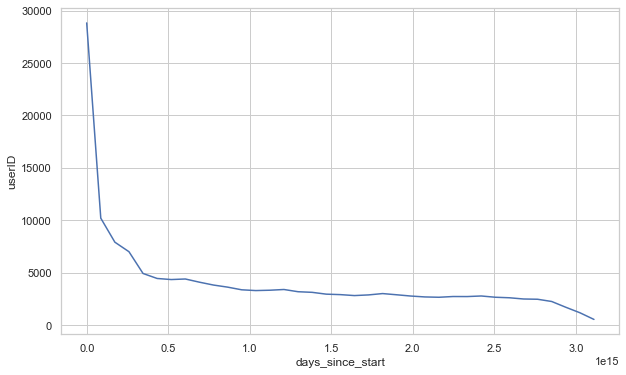

In [413]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=df31, x=df23["days_since_start"], y= df23["userID"])

# fraud detection

## 1.Distribution of installation

In [168]:
df3 = df1.copy()
df3["time_installed_at"] = df3["time_installed_at"].astype(str)
df3["hour_installed_at"] = df3["time_installed_at"].str[:2]

df31 = df3.groupby(['hour_installed_at','network_name']).agg({'time_installed_at':'count'}).reset_index()
df31

,hour_installed_at,network_name,time_installed_at
0,00,Adwords UAC Installs,2856
1,00,Cafebazaar-searchad,1515
2,00,Organic,1613
3,00,Tapsell,1076
4,01,Adwords UAC Installs,1870
...,...,...,...
91,22,Tapsell,2483
92,23,Adwords UAC Installs,3015
93,23,Cafebazaar-searchad,1627
94,23,Organic,1736


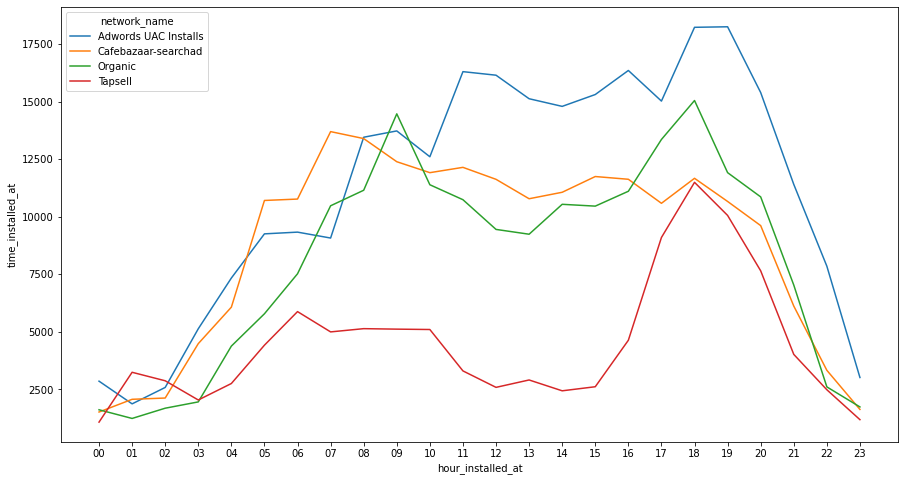

In [103]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=df31, x=df31["hour_installed_at"], y= df31["time_installed_at"], hue=df31["network_name"])

## 2.The distance between events (based on days and hours)

In [160]:
df4 = pd.read_csv('adjust_sampled_data.csv')
df43 = df4.groupby(['adid']).agg({'created_at':['max','min','count']}).reset_index()
df43.columns = ['userID', 'max', 'min', 'count']

df43['max']=  pd.to_datetime(df43['max'], format='%Y/%m/%d %H:%M:%S')
df43['min']=  pd.to_datetime(df43['min'], format='%Y/%m/%d %H:%M:%S')

df43["dis_day"] = (df43["max"] - df43["min"]).dt.days.astype('int16')
df43["dis_hour"] = (df43["max"] - df43["min"]).astype('timedelta64[h]')

df43["count1"] = df43["count"] -1
df43["ave_dist_days"] = (df43["dis_day"] / df43["count1"]).round()
df43["ave_dist_hours"] = (df43["dis_hour"] / df43["count1"]).round()

<AxesSubplot:xlabel='ave_dist_days', ylabel='Count'>

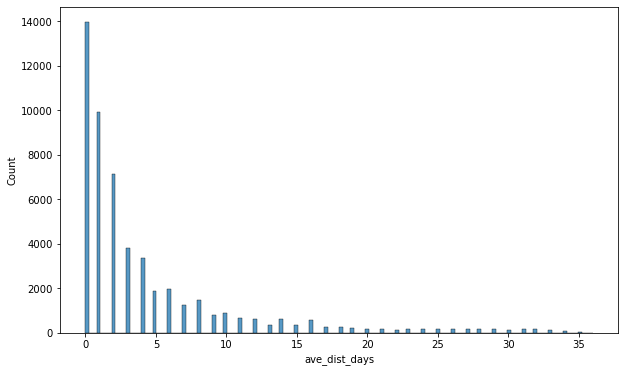

In [166]:
#Average distance between two events based on days
plt.figure(figsize=(10,6))
sns.histplot(data=df43, x=df43["ave_dist_days"])

<AxesSubplot:xlabel='dis_hour', ylabel='Count'>

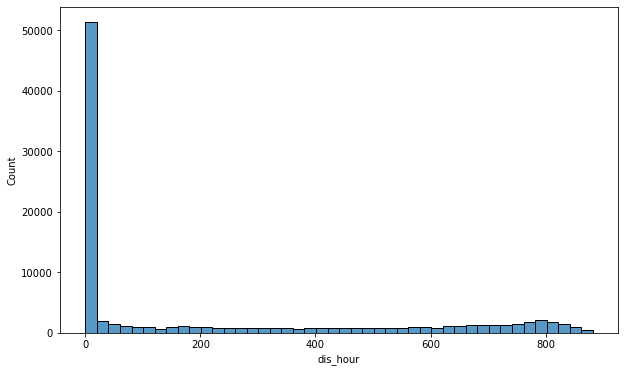

In [167]:
##Average distance between two events based on hours
plt.figure(figsize=(10,6))
sns.histplot(data=df43, x=df43["dis_hour"])

# Choosing an Ad Network

In [321]:
df5 = df1.copy()
df51 = df5.groupby(['network_name','event_name']).agg({'time_created_at':'count'}).reset_index()
df51 = df51[df51["network_name"] != "Organic"]
df51.columns = ['network_name', 'event_name', 'count']

df51.loc[df51.event_name == "get_contact", 'cost'] = 10
df51.loc[df51.event_name == "new_post_submit", 'cost'] = 100

df53 = df51[df51["event_name"] == "get_contact"]
df53.columns = ['network_name', 'get_contact','count_get_contact','value_get_contact']
df53["total_value_contact"] = df53["count_get_contact"] * df53["value_get_contact"]

df54 = df51[df51["event_name"] == "new_post_submit"]
df54.columns = ['network_name', 'new_post_submit','count_new_post','value_post']
df54["total_value_post"] = df54["count_new_post"] * df54["value_post"]

df55 = pd.merge(df53, df54, how='inner', on=['network_name'])
df55 = df55.drop(['get_contact','new_post_submit'],axis=1)

df55["total"] = df55["count_get_contact"] + df55["count_new_post"]

df55

<ipython-input-321-cc0ab45299a8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df53["total_value_contact"] = df53["count_get_contact"] * df53["value_get_contact"]
<ipython-input-321-cc0ab45299a8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df54["total_value_post"] = df54["count_new_post"] * df54["value_post"]


,network_name,count_get_contact,value_get_contact,total_value_contact,count_new_post,value_post,total_value_post,total
0,Adwords UAC Installs,218762,10.0,2187620.0,23257,100.0,2325700.0,242019
1,Cafebazaar-searchad,168956,10.0,1689560.0,14401,100.0,1440100.0,183357
2,Tapsell,77526,10.0,775260.0,8173,100.0,817300.0,85699


In [322]:
#ranking based on size of advertiser network
df55["size_score"] = df55["total"].rank(ascending=0)

#ranking based on Quality of ads in the network
df55["ads_quality"] = (df55["total_value_post"] / df55["count_get_contact"]).rank(ascending=0)

#ranking based on potential value of ads in the contact
df55["contact_score"] = df55["total_value_contact"].rank(ascending=0)

#ranking based on potential value of ads in the post
df55["post_score"] = df55["total_value_post"].rank(ascending=0)

df551 = df55.drop(["count_get_contact","value_get_contact","total_value_contact","count_new_post","value_post","total_value_post","total"],axis=1)

df551

,network_name,size_score,ads_quality,contact_score,post_score
0,Adwords UAC Installs,1.0,1.0,1.0,1.0
1,Cafebazaar-searchad,2.0,3.0,2.0,2.0
2,Tapsell,3.0,2.0,3.0,3.0


In [323]:
# calculating install , uninstall and events
df56 = df5.groupby(['network_name','activity_kind']).agg({'userID':'count'}).reset_index()

df_ins = df56[df56["activity_kind"] == "install"]
df_ins.columns = ['network_name', 'install1', 'install']

df_uni = df56[df56["activity_kind"] == "uninstall"]
df_uni.columns = ['network_name', 'uninstall1', 'uninstall']
df_event = df56[df56["activity_kind"] == "event"]
df_event.columns = ['network_name', 'event1', 'event']


df57 = pd.merge(df_ins, df_uni, how='inner', on=['network_name'])
df58 = pd.merge(df57, df_event, how='inner', on=['network_name'])

df58 = df58.drop(["install1","uninstall1","event1"],axis=1)
df58

,network_name,install,uninstall,event
0,Adwords UAC Installs,24092,4385,242019
1,Cafebazaar-searchad,23590,4826,183357
2,Organic,22783,2934,170072
3,Tapsell,18917,2494,85699


In [324]:
#ranking based on uninstall rate
df58["uninstall_rate"] = ((df58["uninstall"] / df58["install"]) * 100).round()
df58["uninstall_score"] = df58["uninstall_rate"].rank(ascending=1)

#ranking based on convert event
df58["event/install_score"] = (df58["event"] / df58["install"]).rank(ascending=0)

#ranking based on install rate
df58["install_score"] = df58["install"].rank(ascending=1)

df59 = df58.drop(["install","uninstall","event","uninstall_rate"],axis=1)
df59

,network_name,uninstall_score,event/install_score,install_score
0,Adwords UAC Installs,3.0,1.0,4.0
1,Cafebazaar-searchad,4.0,2.0,3.0
2,Organic,1.5,3.0,2.0
3,Tapsell,1.5,4.0,1.0


In [344]:
#merge two dataframe
df60 = pd.merge(df59, df551, how='inner', on=['network_name'])
df61 = pd.merge(df60, best_users, how='inner', on=['network_name'])

#ranking based on best users
df61["best_users_score"] = df61["per_best_users"].rank(ascending=0)
df61 = df61.drop(["per_best_users"],axis=1)

#mean
df61['mean'] = df61.mean(axis=1)
df61["mean_score"] = df61["mean"].rank(ascending=0)

df61.head()

,network_name,uninstall_score,event/install_score,install_score,size_score,ads_quality,contact_score,post_score,best_users_score,mean,mean_score
0,Adwords UAC Installs,3.0,1.0,4.0,1.0,1.0,1.0,1.0,2.0,1.7500,3.0
1,Cafebazaar-searchad,4.0,2.0,3.0,2.0,3.0,2.0,2.0,1.0,2.3750,2.0
2,Tapsell,1.5,4.0,1.0,3.0,2.0,3.0,3.0,3.0,2.5625,1.0


In [345]:
#final_result
selected_channels = df61.drop([ 'uninstall_score', 'event/install_score',
       'install_score', 'size_score', 'ads_quality', 'contact_score',
       'post_score', 'best_users_score'],axis=1)
selected_channels

,network_name,mean,mean_score
0,Adwords UAC Installs,1.7500,3.0
1,Cafebazaar-searchad,2.3750,2.0
2,Tapsell,2.5625,1.0
